<a href="https://colab.research.google.com/github/chandkund/HelloJava/blob/main/01_PyTorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch workflow

Let's explore a an example PyTorch end to end Workflow

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook-  https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions/categories/q-a

In [68]:
 what_were_covering = {1:" data (prepare and load)",
                       2:"build model",
                       3:"fitting the model to data(training)",
                       4:"making predictions and evaluting a model(inference)",
                       5:"saving and loading a model",
                       6:"putting it all together"}
what_were_covering

{1: ' data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluting a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [69]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
# import numpy as np

# Check PyTorch Version
torch.__version__





'2.1.0+cu121'

##1. Data preparing and loading
Data can be almost anything.... in machine learnig

* Excel speadsheet
* Images of any kind
* Videos (youTube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, Let's create same *Knows* data using the linear regression formula.

We'll use a linear regression formula to make a straight line withn *known* **parameter**


1. Formula

* Y_i=f(X_i, \beta)+e_i

* Y_i	=	dependent variable

* f	=	function

* X_i	=	independent variable

* \beta	=	unknown parameters

* e_i	=	error terms


A linear regression line has an equation of the form *Y= a+bX*, where *X* is the Explanatory variable and *Y* is the dependent variablel.The Slope of the line is *b* and *a* is the iintercept(the value of *y* when *x= 0*)

In [70]:
# create *known* parameters

weight = 0.7  # b
bias = 0.3   # a
# formula of linear regression
# Y = a+bX

# Create
start = 0
end = 1
step= 0.02
X = torch.arange(start, end , step).unsqueeze(dim=1) # input
y= weight*X+bias #
print(X[:10])
print("\n")
print(y[:10])
print(f"Lenght of X:{len(X)}")

print(f"Lenght of y:{len(y)}")

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])


tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
Lenght of X:50
Lenght of y:50


2. Splitting our data into training and test sets (Possibly the most important concept in machine learning )


Let's Create a training and  test set with our data.

In [71]:
# create a train /test  split
train_split = int(0.8 * len(X))
print(train_split)
X_train,y_train= X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train) , len(y_train), len(X_test), len(y_test)


40


(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize", "Visualize","Visualize"


In [72]:
def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data= X_test,
                     test_labels=y_test,
                     predictions=None):

# Plots training data ,test data and compares prediction.

 plt.figure(figsize=(10,7))

# plot training data in blue

 plt.scatter(train_data,train_labels,c="b",s=4, label= "Training data")

# plot test data in green
 plt.scatter(test_data,test_labels,c="g" ,s=4, label="Testing data")

 # are there predictions?
 if predictions is not None:
  # plot the predictions if they exist
  plt.scatter(test_data,predictions, c="r", s=4,label="predictions")
  plt.title("Ploting Training and test Data")

  # show the legend
  plt.legend(prop={"size":14});


'''
predictions: This variable contains the predicted values corresponding to the test data.
When you have a model that predicts outcomes based on the test data, predictions holds
those predicted values.

'''


'\npredictions: This variable contains the predicted values corresponding to the test data.\nWhen you have a model that predicts outcomes based on the test data, predictions holds\nthose predicted values.\n\n'

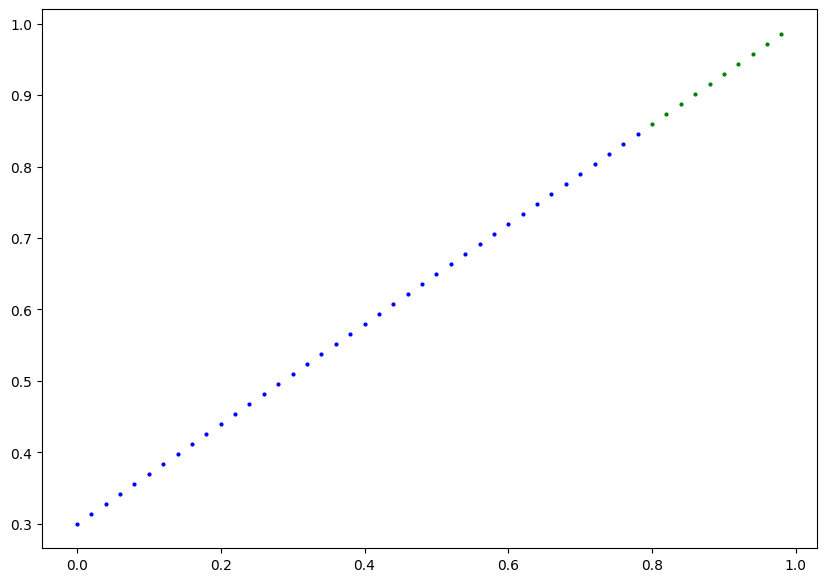

In [73]:
plot_predictions();

## 2. Build model
Our first PyTorch model!

This is very exciting.... let's do it!

Because we're going to be building classeds throughout the course

OOP
following resource from Real python: https://realpython.com/python-classes/


What our model does
* start with random values (weight & bias )
* look at training data and adjust the random values to better rreptresent (oor get closer to ) the ideal values (the weight & bias values we used to create the data )


How does it do so?

Throught two main algorithms:
1. Gradient descent  https://youtu.be/IHZwWFHWa-w
2. Backpropagation https://youtu.be//llg3gGewO5U

In [74]:
'''
nn.Parameter is a class in the PyTorch library (from the torch.nn module)
that is used to automatically register parameters (tensors) as attributes of a nn.Module.

'''
from torch import nn
# Create Linear regression model class
class LinearRegressionModel(nn.Module): # <-almost everything in PyTorch inherhits from nn.module
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,    # <- start with a random weight and try to adjust it to the ideal weight
                                         requires_grad= True, # <- can this parameter be updated via gradient descent ?
                                         dtype =torch.float)) #<- PyTorch loves the datatype torch.float32

    self.bias= nn.Parameter(torch.randn(1,   # <- start with a random weight and try to adjust it to the ideal weight
                                        requires_grad=True,  # <- can this parameter be updated via gradient descent ?
                                        dtype= torch.float)) #<- PyTorch loves the datatype torch.float32
  # Forward method to define the computation in the model
  def forward(self,x: torch.Tensor) -> torch.Tensor: # "x" is the input data
    return self.weights * x +self.bias # this is linear regression formula




### PyTorch model builing essentials
* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graphs)

* torch.nn.parameter - what parameters should our model try and learn , often a PyTorch layer from torch.nn will set these for us

*  torch.nn.Module- The base class for all neural network modules,if you subclass it, you should overwrite forward()

*  torch.optim - this where the optimizers ini pyTorch live ,they will help with gradient descent

*  def forword() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


*  torch.utils.data.Dataset - Represents a map between key (label ) and sample  (features) pair of your data.
  Such as images and their associated labels.

*  torch.utils.data.DataLoader - Creates a Python iterable over a torch Dataset (allow you to iterate over your data )

resources :https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can ckeck our model parameters or what's inside oer model using `.parameters()`.

In [75]:
torch.manual_seed(1234)
torch.randn(1)

tensor([0.0461])

In [76]:
# Create a random seed

torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.model)
model_0 = LinearRegressionModel()

#Check out the parameters

list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [77]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [78]:
weight,bias

(0.7, 0.3)

### Making Prediction using `torch.inference_model()`

To check our model's predictive power , let's see how well it predicts `y_test` based on `x_test`.

When we pass data through our model, it's going to run it through the forword() method.



In [79]:
# Make Predictions with model


with torch.inference_mode():   # Stops PyTorch from tracking tensor views, reducing overhead and potentially improving performance.
                               # Uses with statement for scoped activation and automatic deactivation upon exiting the block.

  y_preds= model_0(X_test)     # # Perform inference without gradient calculation


y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [80]:
y_test,

(tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),)

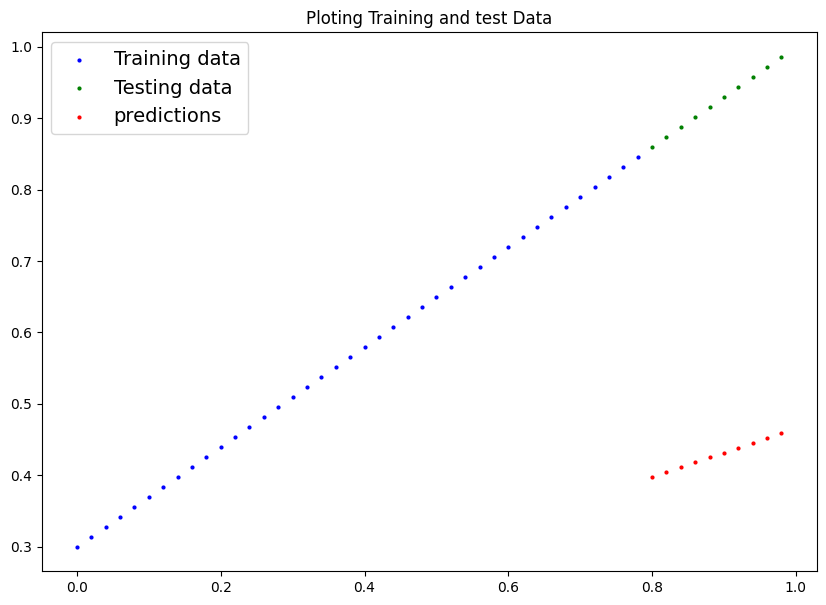

In [81]:
plot_predictions(predictions= y_preds)

### 3.Train Model

The Whole idea of training is for a model to move from some "unknown" parameters (these may be random) to some *known* parameters

or in other words from a poor representation of the data to a better representation of the data


one way to measure how poor or how wrong your models predictions are is to use a loss function

* Note: Loss function may also be called cost function and criterioon in different area.For our case ,we're going to refer to it as a loss function.

*  **Loss function:** A function to measure how wrong  your model's predictions are to the ideal outputs, lower is better. -- https://pytorch.org/docs/stable/nn.html

*  **Optimizer:** Takes into account the loss of a model and adjust the model's parameters(e.g. weight & bias in our case ) to imporve the loss function -- https://pytorch.org/docs/stable/optim.html

inside the optimizer you'll often have to set two parameters:
*   params- the model parameters you'd like to optimizer, for example params= model_0.parameters()

*   lr(learning rate) the learnig rate is a hyperparameter that define how big /small the optimizer change with each step (a small `lr` results in **small change**, a large `lr` result in **large changes**)

And specifically for PyTorch, we need
*  A training Loop
*  A testinig Loop




In [82]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [83]:
'''

The state_dict() method is particularly useful for saving and loading models'
parameters or states, which includes weights, biases, and other learnable
parameters, during training or after training for later use or inference.
It captures the current state of the model's trainable parameters.

'''
# Check out our model's parameter (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [84]:
torch.optim


<module 'torch.optim' from '/usr/local/lib/python3.10/dist-packages/torch/optim/__init__.py'>

In [85]:
# Setup a loss Function
torch.optim

loss_fn= nn.L1Loss()

# Setup an Optimizer

optimizer= torch.optim.SGD(params= model_0.parameters(),
                           lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set




**Q** Which loss function and optimizer should I use ?

**A**  This will be problem specific .But with experience , you'll get an idea of what works and what doesnot with your paticular problem set.

For example, for a regression problem(like ours), a loss functions of `nn.L1Loss()` and an optimizer like torch.optim.SGD() will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat , you'll likely want to use a loss function of nn.BCELoss() (binary cross entropy loss)





### Building a training Loop (and a testing loop )in pytorch

A couple of things we need in a training Loop:

0. Loop through the data
1. Forword Pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also call forward propagation
2. Calculate the loss(Compare forward pass predictions to ground thrut labels)
3. Optimizer
4. Loss Backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the Loss(**backpropagation:-** https://www.youtube.com/watch?v=tleHLnjs5U8)  
5. Optimizer step - us ethe optimizer to adjust our model's paramters to try and improve the loss (**gradient descent:-** https://youtu.be/IHZwWFHWa-w)           
                 

In [86]:
torch.manual_seed(42)
# An Epoch is one loop throught the data..(thsi is a hyperparameter because we've set it ourselves  ).
# Track different values

epoch_count= []
loss_values=[]
test_loss_values=[]

epochs=200
### training
# 0. Loop through the data

for epoch in range(epochs):
  # set the mmodel to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients
  # 1. Forward Pass
  y_preds= model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_preds,y_train)
  print(f"Loss:{loss} ")

  # 3.Optimizer zero grad
  optimizer.zero_grad()

  # 4 perform Backpropagation on the loss with repect to the parameters of the model
  loss.backward()

  # 5 step the optimizer (perform gradient descent)
  optimizer.step() # By default how the optimizer changes will acculumate through the loop so... we have to zero them above in steps

  ### Testing

  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)

  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scense
  # with torch.no_grad(): # you may also torch.no_grad() in order PyTorch.
  # print out model.state_dict()

  # 1. Do the forward pass
     test_pred= model_0(X_test)

  # 2. Calculate the Loss
     test_loss= loss_fn(test_pred,y_test)

  # print out what's happen in
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} | Loss :{loss} | Test Loss : {test_loss}")

  # print out model.state_dict()
    print(model_0.state_dict())



Loss:0.31288138031959534 
Epoch:0 | Loss :0.31288138031959534 | Test Loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss:0.3013603389263153 
Loss:0.28983935713768005 
Loss:0.2783183455467224 
Loss:0.26679736375808716 
Loss:0.2552763521671295 
Loss:0.24375534057617188 
Loss:0.23223432898521423 
Loss:0.22071333229541779 
Loss:0.20919232070446014 
Loss:0.1976713240146637 
Epoch:10 | Loss :0.1976713240146637 | Test Loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss:0.18615034222602844 
Loss:0.1746293306350708 
Loss:0.16310831904411316 
Loss:0.1515873372554779 
Loss:0.14006635546684265 
Loss:0.1285453587770462 
Loss:0.11702437698841095 
Loss:0.1060912236571312 
Loss:0.09681284427642822 
Loss:0.08908725529909134 
Epoch:20 | Loss :0.08908725529909134 | Test Loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss:0.08227583020925522 
Loss:0.

In [87]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)


In [88]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [89]:
# np.array(torch.tensor(plot_predictions(predictions=y_preds)).numpy())

# np.array(torch.tensor(predictions=y_preds).numpy())

In [90]:
weight,bias

(0.7, 0.3)

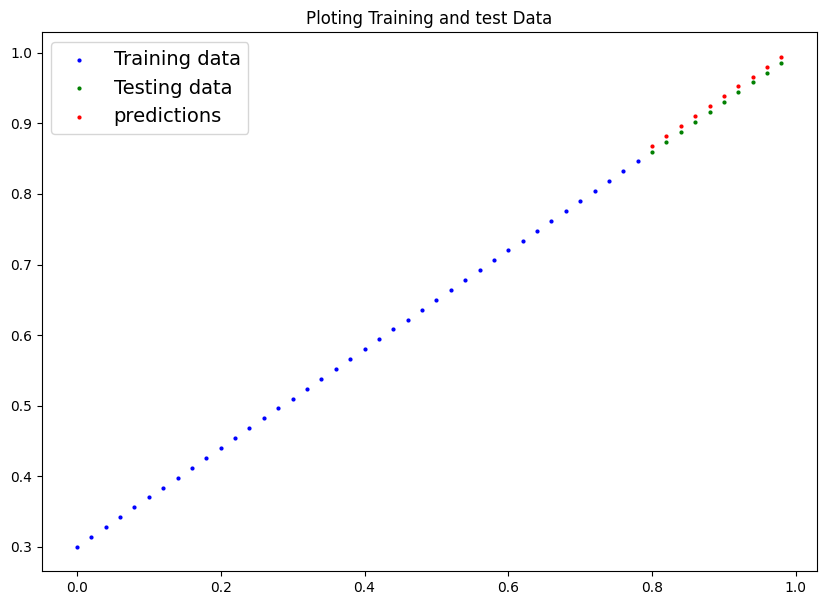

In [91]:
plot_predictions(predictions=y_preds_new);


In [92]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

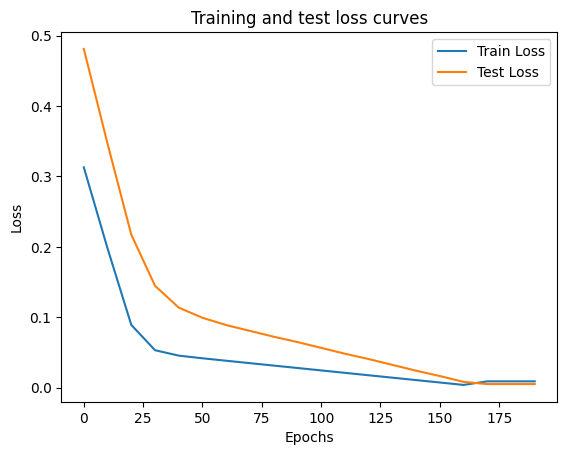

In [93]:
# plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label= "Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [94]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)
  model_0.state_dict()

RuntimeError: ignored

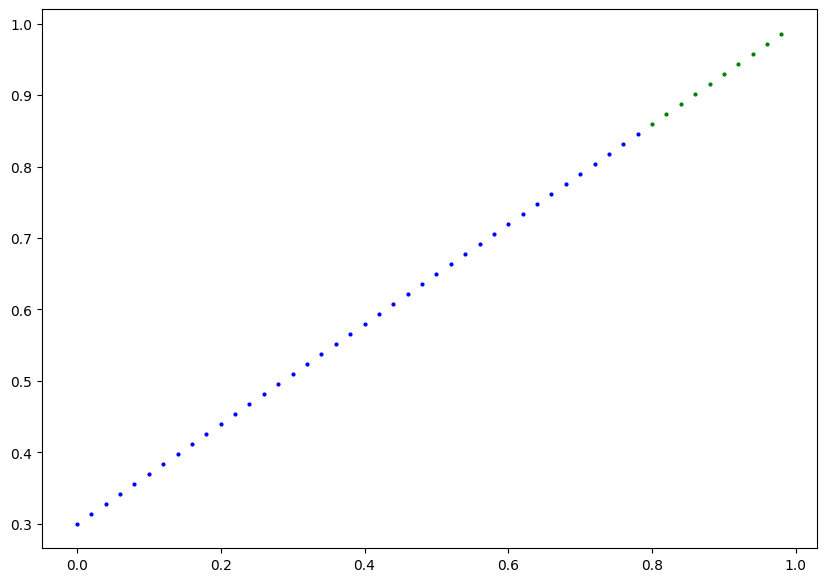

In [95]:
plot_predictions(predictions=y_preds)

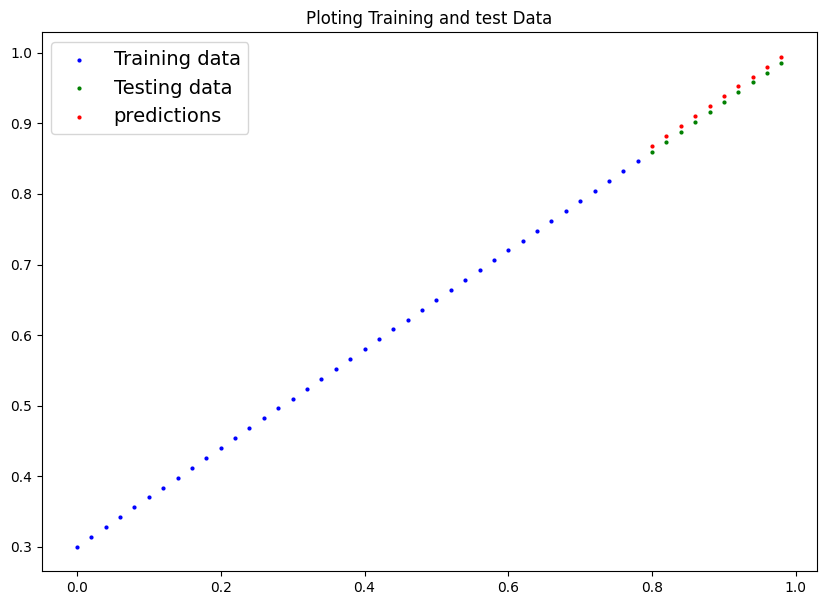

In [96]:
plot_predictions(predictions=y_preds_new)

# saving a model in pytorch

There are three main method you should about for saving and loading models in pytorch.

1.  `torch.save()` - allows you save a pytorch object in python's pickle format
2.  `torch.load()` - allow you load a saved PyTorch object
3.  `torch.nn.Module.load_state_dict()`- this allows to load a model's saved state dictionary



Pytorch save & load
 code tutorial and extra curriculum :
 https://pytorch.org/tutorials/
 beginner/saving_loading_models.html


torch save : https://pytorch.org/docs/stable/generated/torch.save.html


In [97]:
# saving our pytorch model
from pathlib import Path

# 1. Create models  directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2 . Create model save path
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH= MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

# save the model state dict

print(f"saving model to: {MODEL_SAVE_PATH}")

# torch.save(obj, f, pickle_module=pickle, pickle_protocol=DEFAULT_PROTOCOL, _use_new_zipfile_serialization=True)
torch.save(obj= model_0.state_dict(), f=MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model_0.pth


In [98]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Dec 26 15:55 01_pytorch_workflow_model_0.pth


## Loading a Pytorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [99]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [100]:
# TO load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0= LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updates parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()




OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [101]:
#Make some Predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds




tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [102]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [103]:
# Compare loaded model preds witih original model preds
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [104]:
plot.vb

NameError: ignored

##6. putting it all together

let's go back through the steps above and see it all in one place


In [164]:
# import torch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).
If no GPU is available, the code will default to using CPU.



In [165]:
# setup device agnostic code

device= "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:",device)

Using device: cpu


### 6.1 Data (preparing and loading)



In [166]:

# Create some data using the linear regression formula of y=weight*X+bias
weight = 0.7
bias= 0.3

# Create range values
start= 0
end = 1
step= 0.02

# Create X and Y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze, error will pop
y= weight*X+bias
len(X), len(y)
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Split Data

In [167]:
# split data

train_split= int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test= X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

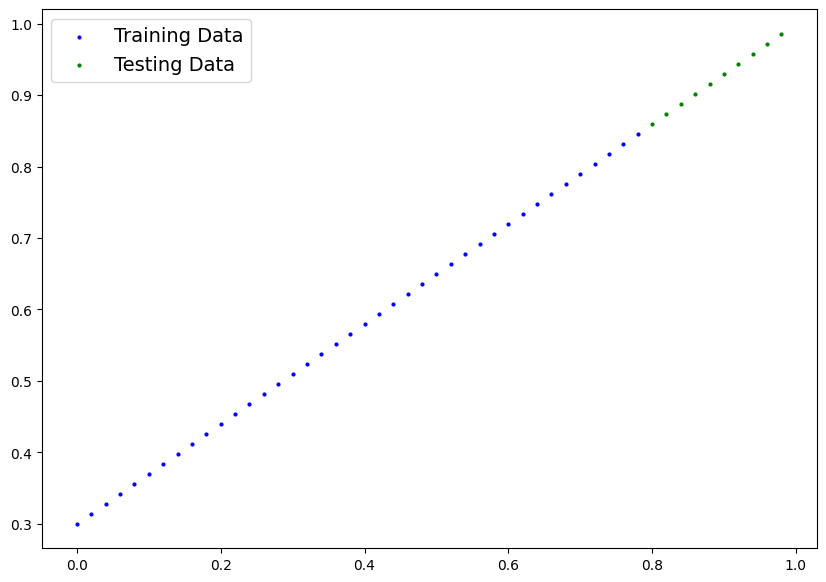

In [168]:
plot_predictions(X_train,y_train,X_test,y_test)

In [169]:
# Plot the Data
# Note: if you don't have the plot_predictions() function loaded, this will error


def plot_predictions(train_data= X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels= y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")

  plt.scatter(test_data,test_labels,c="g",s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label= "predictions")
    plt.title("Ploting training and test Data")
    plt.legend(prop={"size":14});


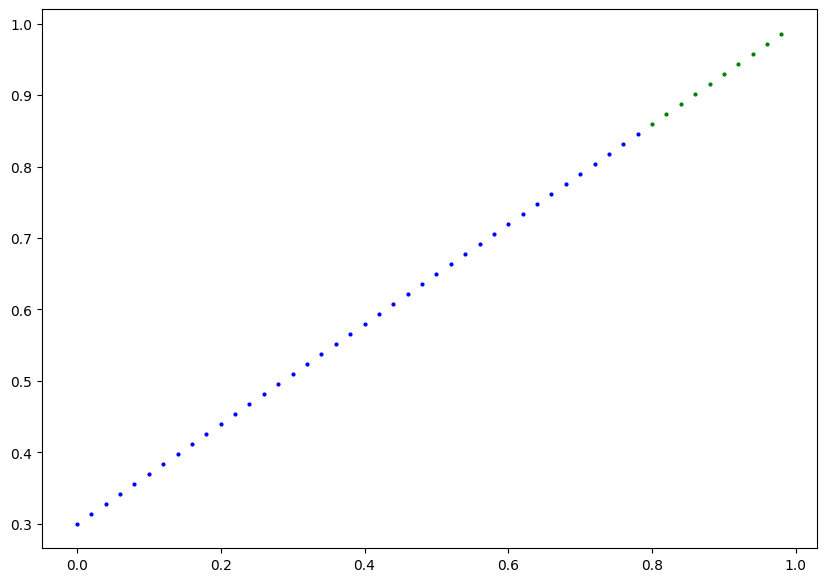

In [170]:
plot_predictions(X_train,y_train,X_test,y_test)

#6.2 Building a PyTorch Linear model

In [171]:

#Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def  __init__(self):
    super().__init__()
    # Use nn.Linear() for Creating the model parameters / also called :linear transform,probing layer ,fully connected ,dense layer
    self.linear_layer= nn.Linear(in_features=1,
                                 out_features=1)


    #self.weights= nn.parameter(torch.randn(1,
    #                                        requires_grad=True,
    #                                        dtype=torch.float))

    #self.bias= nn.parameter(torch.randn(1,
    #                                    requires_grad=True,
    #                                    dtype=torch.float))

  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)
    #return self.weights*x+self.bias


# set the manual seed

torch.manual_seed(42)
model_1= LinearRegressionModelV2()
model_1,model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [172]:
# Check the model current device
next(model_1.parameters()).device


device(type='cpu')

In [173]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [174]:
X_train[:5],y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [175]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [176]:
# set the model to use the traget device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [177]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### 6.3 Training

For training we need :
* Loss function
* Optimizer
* Training loop
* Testing Loop



In [178]:
# Setup loss function
loss_fn= nn.L1Loss()

# setup our optimizer
optimizer= torch.optim.SGD(params= model_1.parameters(),
                           lr=0.01)

In [179]:
# Let's write a training loop
torch.manual_seed(42)

epochs=200

# put data on the target device (device agnostic code for data)

X_test= X_test.to(device)
X_train=X_train.to(device)
y_test= y_test.to(device)
y_train= y_train.to(device)

for epoch in range(epochs):
  model_1.train() # training

  y_pred= model_1(X_train) # forward Pass

  loss=loss_fn(y_pred,y_train) # calculate the loss

  optimizer.zero_grad()  # zero grad set

  loss.backward() # backward propagation

  optimizer.step() # step by step program

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)

    test_loss= loss_fn(test_pred,y_test)

  if epoch%10 == 0 :

    print(f"Epoch :{epoch} |Loss {loss} | Test loss values = {test_loss}")



Epoch :0 |Loss 0.5551779866218567 | Test loss values = 0.5739762187004089
Epoch :10 |Loss 0.4399680495262146 | Test loss values = 0.4392663538455963
Epoch :20 |Loss 0.3247582018375397 | Test loss values = 0.30455657839775085
Epoch :30 |Loss 0.20954827964305878 | Test loss values = 0.16984674334526062
Epoch :40 |Loss 0.09433844685554504 | Test loss values = 0.03513689711689949
Epoch :50 |Loss 0.023886386305093765 | Test loss values = 0.04784906655550003
Epoch :60 |Loss 0.0199567973613739 | Test loss values = 0.04580312222242355
Epoch :70 |Loss 0.016517987474799156 | Test loss values = 0.0375305712223053
Epoch :80 |Loss 0.013089170679450035 | Test loss values = 0.029944902285933495
Epoch :90 |Loss 0.009653178043663502 | Test loss values = 0.02167237363755703
Epoch :100 |Loss 0.006215679459273815 | Test loss values = 0.014086711220443249
Epoch :110 |Loss 0.002787243574857712 | Test loss values = 0.005814164876937866
Epoch :120 |Loss 0.0012645035749301314 | Test loss values = 0.01380180753

In [180]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [181]:
weight,bias

(0.7, 0.3)

###6.4  Making and evaluating predictions



In [182]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds= model_1(X_test)
y_preds


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

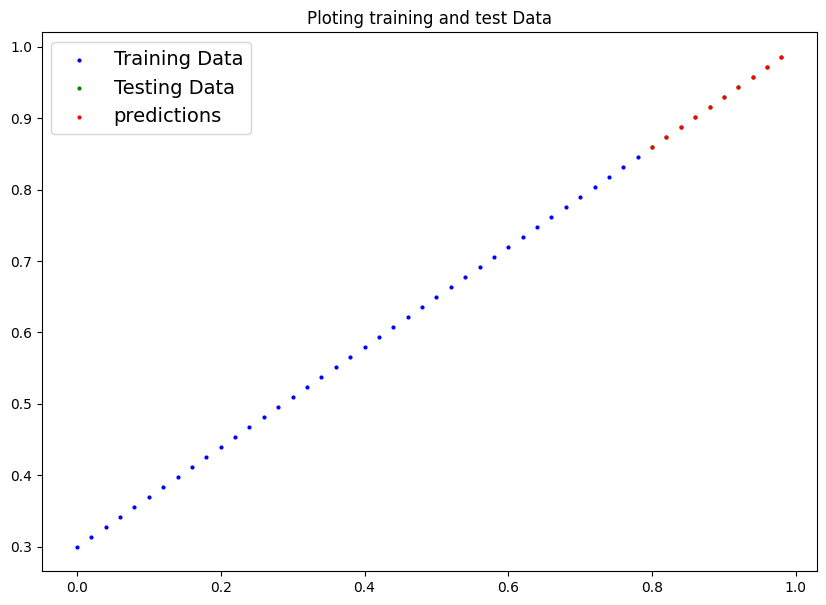

In [183]:
# Checking out our model predictiond visually
plot_predictions(predictions=y_preds.cpu())

###6.5 Saving & loading a trained model

In [184]:
from pathlib import Path
# 1. Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True ,exist_ok = True)

# Create model save path

MODEL_NAME= "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH =MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_1.pth


In [185]:
# load a pytorch model

# Create a new instance of linear regression model V2
loaded_model_1= LinearRegressionModelV2()

# load the saved model_1 state dict

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [186]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [187]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [188]:
# evaluation loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## EXERCISES

In [189]:
# import torch and matplotlib
import torch
import matplotlib.pyplot as plt
from torch import nn
torch.__version__

'2.1.0+cu121'

In [190]:
# setup devicee agnostic

# device= "cuda" if torch.cuda.is_available() else "cpu"
# device

## DATA

In [191]:
weight =0.3
bias= 0.9

start= 0
end = 1
step= 0.01

X= torch.arange(start,end,step).unsqueeze(dim= 1)
y= weight*X+bias
print("print the lenght of X ",len(X))
print("print the lenght of y", len(y))
X[:10],y[:10]

print the lenght of X  100
print the lenght of y 100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

# Split the data

In [192]:
train_split= int(0.8*len(X))
X_train,y_train= X[:train_split],y[:train_split]
X_test,y_test= X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(80, 80, 20, 20)

# Plot the training and testing data

In [193]:
def plot_predictions(train_data= X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels= y_test,
                     predictions= None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,c="b",s=4,label= "Training Data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")

  if predictions is not None:
    plt.scatter(predictions,test_data,c="r", s=4 ,label="predictions")
  plt.legend(prop={"size":14})


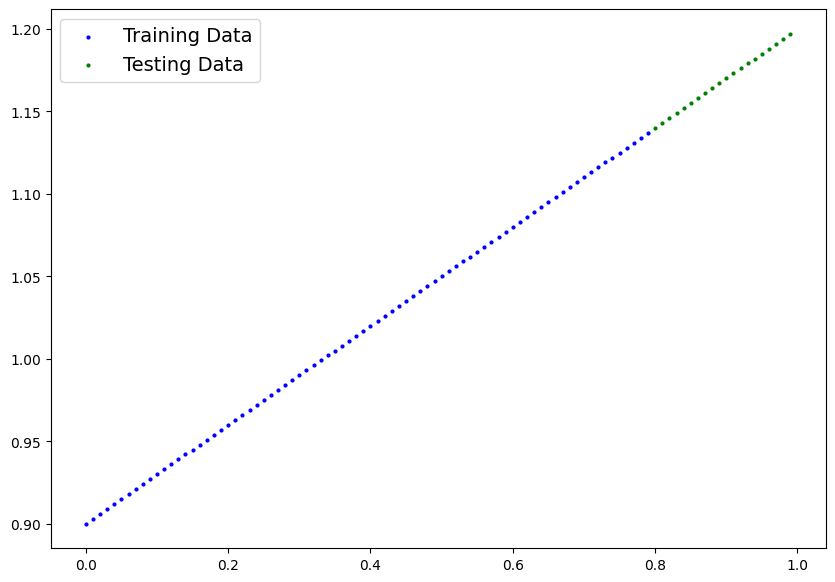

In [194]:
plot_predictions()

## Building Model

In [195]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.Linear_layer= nn.Linear(in_features=1,
                                 out_features=1)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.Linear_layer(x)


In [219]:
# Checking Content
torch.manual_seed(42)

model_2 = LinearRegressionModelV2()

model_2,model_2.state_dict()

(LinearRegressionModelV2(
   (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('Linear_layer.weight', tensor([[0.7645]])),
              ('Linear_layer.bias', tensor([0.8300]))]))

In [218]:

with torch.inference_mode():
  y_preds=model_2(X_test)

y_preds


tensor([[1.2566],
        [1.2627],
        [1.2687],
        [1.2748],
        [1.2809],
        [1.2869],
        [1.2930],
        [1.2991],
        [1.3052],
        [1.3112],
        [1.3173],
        [1.3234],
        [1.3294],
        [1.3355],
        [1.3416],
        [1.3476],
        [1.3537],
        [1.3598],
        [1.3658],
        [1.3719]])

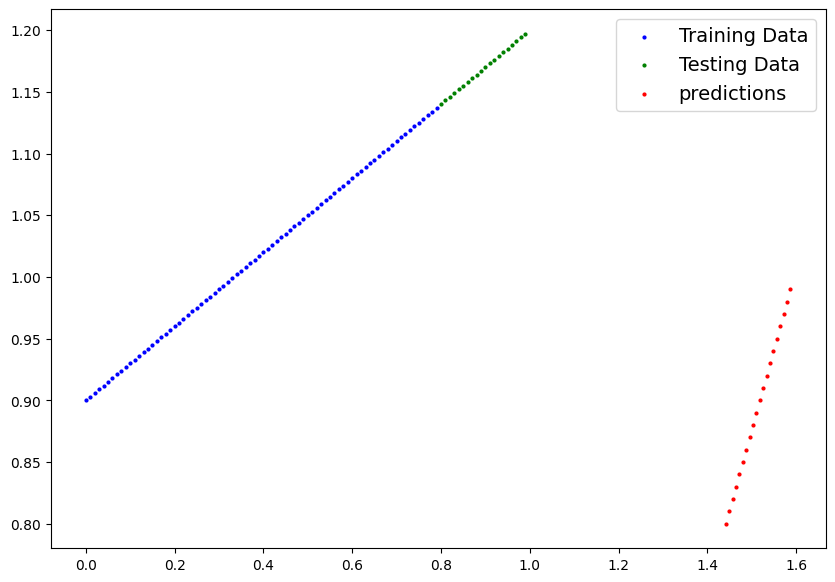

In [198]:
plot_predictions(predictions=y_preds)

In [199]:
'''
next(model_2.parameters()).device
model_2.to(device)
next(model_2.parameters()).device
'''

'\nnext(model_2.parameters()).device\nmodel_2.to(device)\nnext(model_2.parameters()).device\n'

## Training and testing model

1. setup loss function
2. setup optimizer
3. training loop
4. testing loop



In [227]:
# setup loss function
loss_fn= nn.L1Loss()

# setup optimizer

optimizer= torch.optim.SGD(params=model_2.parameters(),
                           lr= 0.01)

In [228]:
# training loop

torch.manual_seed(42)

epochs= 300

epoch_count=[]
loss_values=[]
test_loss_values=[]

#X_train=X_train.to(device)
#y_train=y_train.to(device)
#X_test=X_test.to(device)
#y_test=y_test.to(device)

for epoch in range(epochs):
  model_2.train() # training
  y_pred= model_2(X_train) # foward pass
  loss=loss_fn(y_pred,y_train)  #  Calculate the loss
  optimizer.zero_grad() # Optimizer zero grad
  loss.backward()  # back propagations
  optimizer.step() # progress step by step
  # testing

  model_2.eval()
  with torch.inference_mode():
    test_pred= model_2(X_test)
    test_loss = loss_fn(test_pred,y_test.type(torch.float))

  if epoch % 10 == 0 :
    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch : {epoch} |loss: {loss}| test_loss: {test_loss} ")

print(model_2.state_dict())


Epoch : 0 |loss: 0.06503831595182419| test_loss: 0.15278442203998566 
Epoch : 10 |loss: 0.06161315366625786| test_loss: 0.144792839884758 
Epoch : 20 |loss: 0.058187104761600494| test_loss: 0.13680128753185272 
Epoch : 30 |loss: 0.0547611229121685| test_loss: 0.12846574187278748 
Epoch : 40 |loss: 0.05133599787950516| test_loss: 0.12047417461872101 
Epoch : 50 |loss: 0.04790995270013809| test_loss: 0.11248259246349335 
Epoch : 60 |loss: 0.044483937323093414| test_loss: 0.1041470542550087 
Epoch : 70 |loss: 0.04105884209275246| test_loss: 0.09615547955036163 
Epoch : 80 |loss: 0.037632763385772705| test_loss: 0.08816371113061905 
Epoch : 90 |loss: 0.03420667722821236| test_loss: 0.08017189800739288 
Epoch : 100 |loss: 0.030781561508774757| test_loss: 0.07183612883090973 
Epoch : 110 |loss: 0.027355477213859558| test_loss: 0.06384433805942535 
Epoch : 120 |loss: 0.02392939105629921| test_loss: 0.05585255101323128 
Epoch : 130 |loss: 0.02050427906215191| test_loss: 0.04751678183674812 
Ep

In [242]:
with torch.inference_mode():
  y_preds_new = model_2(X_test)
y_preds_new

tensor([[1.1320],
        [1.1350],
        [1.1380],
        [1.1410],
        [1.1440],
        [1.1470],
        [1.1501],
        [1.1531],
        [1.1561],
        [1.1591],
        [1.1621],
        [1.1652],
        [1.1682],
        [1.1712],
        [1.1742],
        [1.1772],
        [1.1803],
        [1.1833],
        [1.1863],
        [1.1893]])

In [243]:
model_2.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.3019]])),
             ('Linear_layer.bias', tensor([0.8904]))])

In [244]:
weight,bias

(0.3, 0.9)

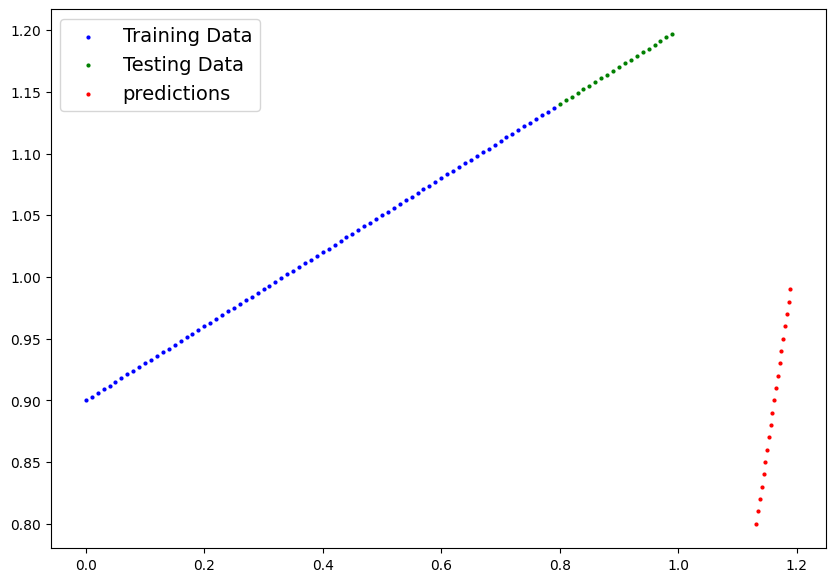

In [245]:
plot_predictions(predictions= y_preds_new)

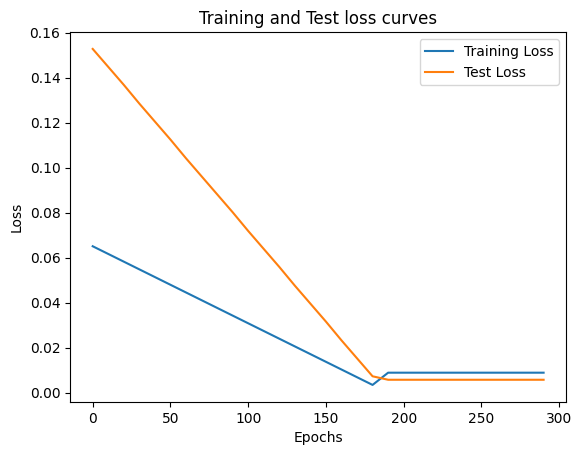

In [241]:
plt.plot(epoch_count,loss_values,label= "Training Loss")
plt.plot(epoch_count,test_loss_values,label ="Test Loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [217]:
model_2.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.6069]])),
             ('Linear_layer.bias', tensor([0.7711]))])

In [204]:
weight,bias

(0.3, 0.9)

Making predictions

tensor([[1.2828],
        [1.2894],
        [1.2960],
        [1.3026],
        [1.3092],
        [1.3158],
        [1.3224],
        [1.3290],
        [1.3356],
        [1.3422],
        [1.3488],
        [1.3554],
        [1.3620],
        [1.3686],
        [1.3752],
        [1.3818],
        [1.3884],
        [1.3950],
        [1.4016],
        [1.4082]])

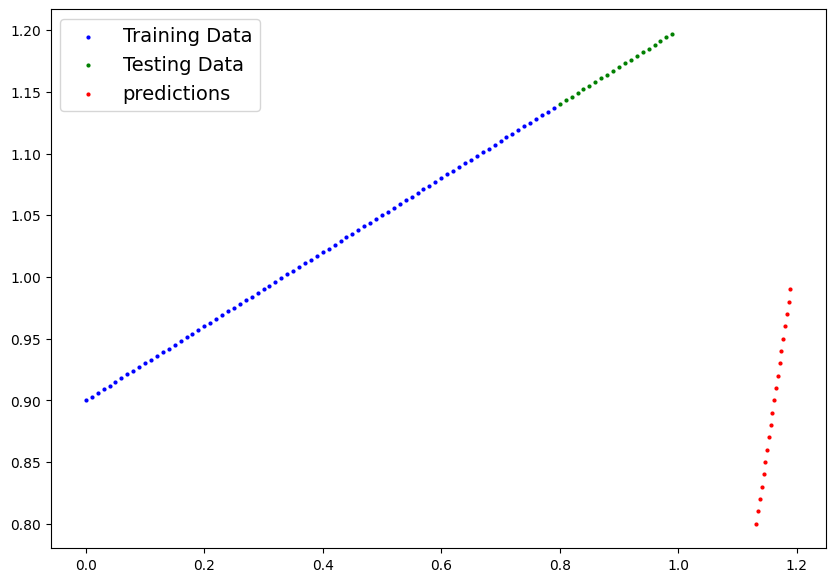

In [246]:
plot_predictions(predictions= y_preds_new)